In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
clf = LogisticRegression(
    solver='liblinear',
    penalty='l2',
    C=1.0,
    max_iter=1000,
    random_state=42
)
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [5]:
y_proba = clf.predict_proba(X_test)[:, 1]

In [6]:
thresholds_to_try = [0.3, 0.5, 0.7]

In [7]:
for thresh in thresholds_to_try:
    # Convert probabilities to class labels using threshold
    y_pred_thresh = (y_proba >= thresh).astype(int)
    
    # Compute confusion matrix and F1-score
    cm = confusion_matrix(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    
    print(f"Threshold = {thresh:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print(f"F1-score: {f1:.4f}")
    print("-" * 30)

Threshold = 0.30
Confusion Matrix:
[[38  4]
 [ 1 71]]
F1-score: 0.9660
------------------------------
Threshold = 0.50
Confusion Matrix:
[[40  2]
 [ 2 70]]
F1-score: 0.9722
------------------------------
Threshold = 0.70
Confusion Matrix:
[[40  2]
 [ 4 68]]
F1-score: 0.9577
------------------------------


In [8]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

In [9]:
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = roc_thresholds[optimal_idx]
opt_fpr = fpr[optimal_idx]
opt_tpr = tpr[optimal_idx]

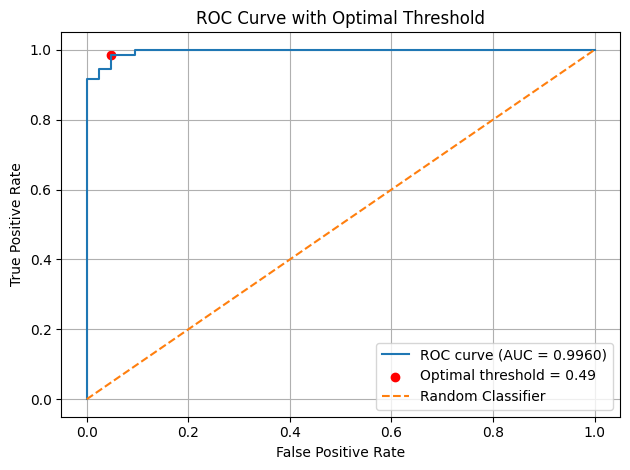

In [10]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.scatter([opt_fpr], [opt_tpr], 
            marker='o', color='red', 
            label=f'Optimal threshold = {optimal_threshold:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimal Threshold')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()